Classify the email using the binary classification method. Email Spam detection has two states:
1. Normal State – Not Spam
2. Abnormal State – Spam.

Use Support Vector Machine for classification. Analyze their performance.

Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('emails.csv')

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,...,especially,dorcheus,del,millions,insurance,pooling,trial,tennessee,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,141,0,21,1,1,39,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,79,0,0,0,1,21,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,71,0,0,0,1,11,8,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,know,...,especially,dorcheus,del,millions,insurance,pooling,trial,tennessee,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.00000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,10.935808,5.386118,1.388631,1.335267,45.857889,3.229312,0.924401,0.850928,0.804718,0.939675,0.814385,6.932328,1.978732,41.811872,1.408546,4.501160,0.657386,1.767208,4.807425,0.813998,0.617363,7.749033,0.838167,5.332367,0.734532,1.225251,0.538090,0.635151,0.627804,9.109049,84.795244,0.792343,1.526489,0.412993,0.580046,24.337780,1.306458,0.489366,0.363109,0.339907,...,0.005027,0.004060,0.317092,0.006187,0.005220,0.004060,0.039056,0.005607,0.007927,0.006961,0.005994,0.005607,0.004254,0.004254,0.004640,0.008701,0.005994,0.006381,0.008894,0.00406,0.004060,0.005414,0.070766,0.004060,0.008701,0.006187,0.005800,0.017208,0.006381,0.015855,0.005800,0.004640,0.006381,0.005027,0.006961,0.037510,0.008894,0.004060,0.005220,0.005607,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,17.999402,9.144407,2.849708,4.570525,77.832221,5.045836,2.084255,2.065738,1.444839,2.036278,2.001731,12.949766,3.719254,66.530032,2.583277,8.377237,1.247460,11.002626,7.568755,1.657193,1.844452,12.538043,1.771383,8.256332,1.930954,2.375526,1.945471,1.516908,1.130827,14.494729,126.845509,2.252096,3.100501,1.554642,1.430790,37.982823,2.672958,1.210444,1.116678,0.737750,...,0.073413,0.108536,1.063446,0.089911,0.095194,0.093198,0.425931,0.093118,0.147614,0.096094,0.118664,0.077224,0.073462,0.070781,0.067969,0.210261,0.077195,0.123437,0.110895,0.08675,0.066569,0.080906,0.367953,0.066569,0.132372,0.087733,0.100112,0.191417,0.097135,0.140928,0.133259,0.073439,0.097135,0.073413,0.162025,0.239546,0.099885,0.066569,0.084428,0.192108,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
# Check if there is missing values
missing = df.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)

Missing Values
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [ ]:
df = df.drop(columns=["Email No."])

In [ ]:
# Counting the number of duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows = ", duplicates)

# Drop the duplicate rows and update the dataset
df.drop_duplicates(inplace=True)

# Verify there are no more duplicate records
assert df.duplicated().sum() == 0
print("No more duplicate records")

Duplicate rows =  541
No more duplicate records


In [ ]:
# prompt: split the dataset into training and testing dataset

from sklearn.model_selection import train_test_split

# Assuming 'Prediction' is your target variable
X = df.drop('Prediction', axis=1)
y = df['Prediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3704, 3000) (927, 3000) (3704,) (927,)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svc = SVC()


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf' and 'poly'
}


# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=2) # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best estimator (KNN model with the best hyperparameters)
best_svc = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  20.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  19.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  20.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  19.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  20.6s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  20.9s
[CV] END ....................C=0.1, gamma=scale

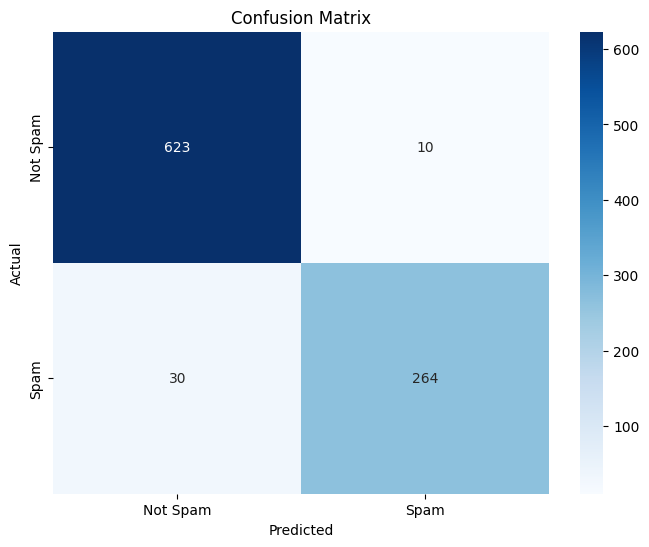

True Negatives: 623
False Positives: 10
False Negatives: 30
True Positives: 264


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            # xticklabels=['Predicted 0', 'Predicted 1'],
            # yticklabels=['Actual 0', 'Actual 1'])
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")